In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("y_train.csv")

In [16]:
rf = RandomForestClassifier()

randomForestModel = rf.fit(X_train, Y_train)

/usr/local/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [14]:
X_test = pd.read_csv("X_test.csv")
Y_test = pd.read_csv("y_test.csv")

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, recall_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

def predict_churn(model):
    # --------------------
    # Train va test predict
    # --------------------
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # --------------------
    # Metrics
    # --------------------
    score_train = f1_score(Y_train, pred_train)
    score_test = f1_score(Y_test, pred_test)

    accuracy_train = accuracy_score(Y_train, pred_train)
    accuracy_test = accuracy_score(Y_test, pred_test)

    precision_train = precision_score(Y_train, pred_train)
    precision_test = precision_score(Y_test, pred_test)

    recall_train = recall_score(Y_train, pred_train)
    recall_test = recall_score(Y_test, pred_test)

    # --------------------
    # Print metrics
    # --------------------
    print("-" * 50)
    print(f"Train F1 Score   : {score_train:.4f}")
    print(f"Test  F1 Score   : {score_test:.4f}")
    print("-" * 50)
    print(f"Train Accuracy   : {accuracy_train:.4f}")
    print(f"Test  Accuracy   : {accuracy_test:.4f}")
    print("-" * 50)
    print(f"Train Precision  : {precision_train:.4f}")
    print(f"Test  Precision  : {precision_test:.4f}")
    print("-" * 50)
    print(f"Train Recall     : {recall_train:.4f}")
    print(f"Test  Recall     : {recall_test:.4f}")
    print("-" * 50)
    print("\nClassification Report (Test):\n")
    print(classification_report(Y_test, pred_test))
    print("-" * 50)

    # --------------------
    # Confusion Matrix & ROC Curve (Subplots)
    # --------------------
    cm = confusion_matrix(Y_test, pred_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(Y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].set_title('Confusion Matrix')

    # ROC Curve
    axes[1].plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('ROC Curve')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

--------------------------------------------------
Train F1 Score   : 0.9966
Test  F1 Score   : 0.5411
--------------------------------------------------
Train Accuracy   : 0.9982
Test  Accuracy   : 0.7942
--------------------------------------------------
Train Precision  : 0.9986
Test  Precision  : 0.6867
--------------------------------------------------
Train Recall     : 0.9946
Test  Recall     : 0.4465
--------------------------------------------------

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1026
           1       0.69      0.45      0.54       383

    accuracy                           0.79      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

--------------------------------------------------


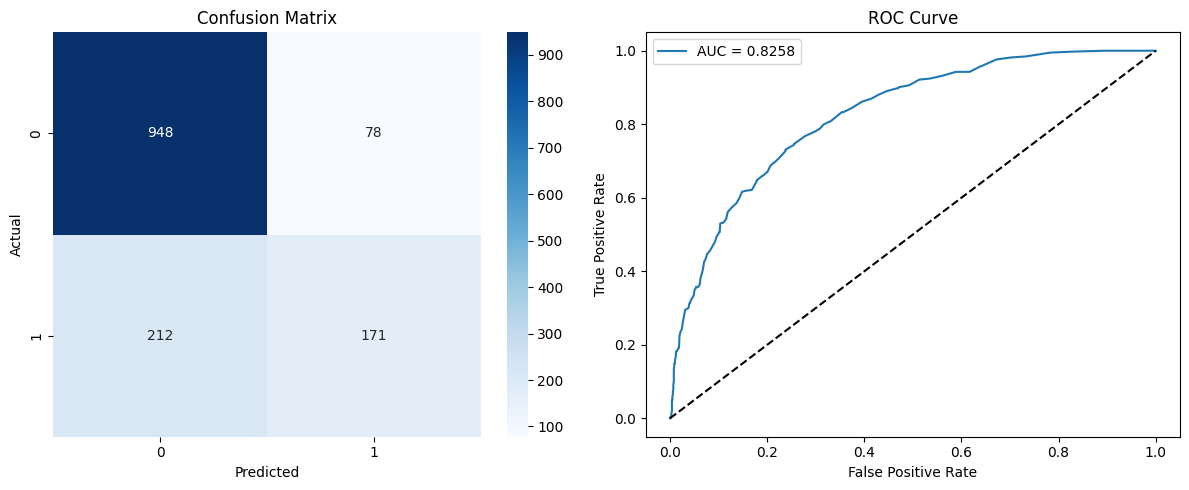

In [19]:
predict_churn(randomForestModel)